<a href="https://colab.research.google.com/github/ob1knb/phd-thesis/blob/master/Burke_Code_3_components_%26_Time_Shift_September_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dataset Assembly**







Dataset 1: Meltwater Dataset

In [ ]:
!pip install seaborn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,4
import warnings
warnings.filterwarnings('ignore')
from ast import increment_lineno


In [ ]:
#stats = pd.read_csv('/content/Walt_Disney Oct 27-Dec 21, 2023 .csv')
#stats = pd.read_csv('/content/DisneyFinal2.csv')
stats = pd.read_csv('/content/DisneyFinal3.csv')
#first row as header:
#stats.columns = stats.iloc[0]
#stats = stats[1:]

In [ ]:
stats.head()

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,Language,...,Editorial Echo,Views,Likes,Replies,Retweets,Comments,Shares,Reactions,Threads,Is Verified
0,7/22/2022,NaN,http://twitter.com/shongables/statuses/1550632...,NaN,FLORIDA: Magic Kingdom not so magical after a ...,Twitter,@shongables,United States,NaN,English,...,NaN,NaN,13.0,8.0,NaN,NaN,13.0,13.0,8.0,True
1,7/22/2022,NaN,http://twitter.com/PrincessAzilem/statuses/155...,NaN,This Raccoonda needs a mega pint of wine. It w...,Twitter,@PrincessAzilem,United States,NaN,English,...,NaN,NaN,1.0,0.0,NaN,NaN,3.0,1.0,0.0,False
2,7/22/2022,NaN,http://twitter.com/MyRealtorJoshF/statuses/155...,NaN,Would you rather spend five days exploring Dis...,Twitter,@MyRealtorJoshF,United States,NaN,English,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,7/22/2022,NaN,http://twitter.com/justincreates/statuses/1550...,NaN,Marvel Studios has reportedly trademarked the ...,Twitter,@justincreates,United States,NaN,English,...,NaN,NaN,0.0,0.0,NaN,NaN,1.0,0.0,0.0,False
4,7/22/2022,NaN,http://twitter.com/marialugo351/statuses/15506...,NaN,So good I had to share! Check out all the item...,Twitter,@marialugo351,United States,NaN,English,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136064 entries, 0 to 136063
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Date                   136064 non-null  object
 1   Headline               1 non-null       object
 2   URL                    136064 non-null  object
 3   Opening Text           18778 non-null   object
 4   Hit Sentence           136064 non-null  object
 5   Source                 135892 non-null  object
 6   Influencer             135890 non-null  object
 7   Country                135892 non-null  object
 8   Subregion              3 non-null       object
 9   Language               135892 non-null  object
 10  Reach                  133332 non-null  object
 11  Desktop Reach          3 non-null       object
 12  Mobile Reach           3 non-null       object
 13  Twitter Social Echo    3 non-null       object
 14  Facebook Social Echo   3 non-null       object
 15  

In [ ]:
len(stats)

136064

In [ ]:
stats.columns

Index(['Date', 'Headline', 'URL', 'Opening Text', 'Hit Sentence', 'Source',
       'Influencer', 'Country', 'Subregion', 'Language', 'Reach',
       'Desktop Reach', 'Mobile Reach', 'Twitter Social Echo',
       'Facebook Social Echo', 'Reddit Social Echo', 'National Viewership',
       'Engagement', 'AVE', 'Sentiment', 'Key Phrases', 'Input Name',
       'Keywords', 'Twitter Authority', 'Tweet Id', 'Twitter Id',
       'Twitter Client', 'Twitter Screen Name', 'User Profile Url',
       'Twitter Bio', 'Twitter Followers', 'Twitter Following',
       'Alternate Date Format', 'Time', 'State', 'City', 'Social Echo Total',
       'Editorial Echo', 'Views', 'Likes', 'Replies', 'Retweets', 'Comments',
       'Shares', 'Reactions', 'Threads', 'Is Verified'],
      dtype='object')

In [ ]:
#removing empty Columns
#stats = stats[['Hit Sentence', 'Influencer', 'Reach',
      # 'Engagement', 'AVE',
      # 'Twitter Authority',
      # 'Twitter Followers', 'Twitter Following',
      # 'Alternate Date Format', 'Views', 'Likes', 'Replies', 'Retweets',
      # 'Shares', 'Reactions', 'Threads']]

In [ ]:
#removing empty Columns (removing columns with lots of nulls)
stats = stats[['Hit Sentence', 'Influencer', 'Reach',
       'AVE',
       'Twitter Authority',
       'Twitter Followers', 'Twitter Following',
       'Alternate Date Format']]

In [ ]:
#Renaming the columns with single-word syntax
#stats.columns = ['HitSentence', 'Influencer', 'Reach',
     #  'Engagement', 'AVE',
     #  'TwitterAuthority',
     #  'TwitterFollowers', 'TwitterFollowing',
     #  'Date', 'Views', 'Likes', 'Replies', 'Retweets',
     #  'Shares', 'Reactions', 'Threads']

In [ ]:
#Renaming the columns with single-word syntax (removing columns with lots of nulls)
stats.columns = ['HitSentence', 'Influencer', 'Reach',
       'AVE',
       'TwitterAuthority',
       'TwitterFollowers', 'TwitterFollowing',
       'Date']

In [ ]:
stats.columns

Index(['HitSentence', 'Influencer', 'Reach', 'AVE', 'TwitterAuthority',
       'TwitterFollowers', 'TwitterFollowing', 'Date'],
      dtype='object')

In [ ]:
#Replace NAs in column:
#stats['Engagement'] = stats['Engagement'].fillna(0)
#stats['Shares'] = stats['Shares'].fillna(0)
#stats['Reactions'] = stats['Reactions'].fillna(0)
#stats['Threads'] = stats['Threads'].fillna(0)
#stats['Views'] = stats['Views'].fillna(0)
#stats['Likes'] = stats['Likes'].fillna(0)
#stats['Replies'] = stats['Replies'].fillna(0)
#stats['Retweets'] = stats['Retweets'].fillna(0)
#stats['TwitterFollowing'] = stats['TwitterFollowing'].fillna(0)
#stats['TwitterFollowers'] = stats['TwitterFollowers'].fillna(0)
#stats['TwitterAuthority'] = stats['TwitterAuthority'].fillna(0)
#stats['Reach'] = stats['Reach'].fillna(0)

#alternate:
#stats['Engagement'] = stats['Engagement'].replace(np.nan, 0)
#stats['Shares'] = stats['Shares'].replace(np.nan, 0)
#stats['Reactions'] = stats['Reactions'].replace(np.nan, 0)
#stats['Threads'] = stats['Threads'].replace(np.nan, 0)
#stats['Views'] = stats['Views'].replace(np.nan, 0)
#stats['Likes'] = stats['Likes'].replace(np.nan, 0)
#stats['Replies'] = stats['Replies'].replace(np.nan, 0)
#stats['Retweets'] = stats['Retweets'].replace(np.nan, 0)
#stats['TwitterFollowing'] = stats['TwitterFollowing'].replace(np.nan, 0)
#stats['TwitterFollowers'] = stats['TwitterFollowers'].replace(np.nan, 0)
#stats['TwitterFollowers'] = stats['TwitterFollowers'].replace(np.nan, 0)
#stats['TwitterAuthority'] = stats['TwitterAuthority'].replace(np.nan, 0)
#stats['Reach'] = stats['Reach'].replace(np.nan, 0)


In [ ]:
#Replace NAs in column (with columns with high numbers of Nulls removed):

stats['TwitterFollowing'] = stats['TwitterFollowing'].fillna(0)
stats['TwitterFollowers'] = stats['TwitterFollowers'].fillna(0)
stats['TwitterAuthority'] = stats['TwitterAuthority'].fillna(0)
stats['Reach'] = stats['Reach'].fillna(0)

#alternate:

stats['TwitterFollowing'] = stats['TwitterFollowing'].replace(np.nan, 0)
stats['TwitterFollowers'] = stats['TwitterFollowers'].replace(np.nan, 0)
stats['TwitterFollowers'] = stats['TwitterFollowers'].replace(np.nan, 0)
stats['TwitterAuthority'] = stats['TwitterAuthority'].replace(np.nan, 0)
stats['Reach'] = stats['Reach'].replace(np.nan, 0)

In [ ]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136064 entries, 0 to 136063
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   HitSentence       136064 non-null  object
 1   Influencer        135890 non-null  object
 2   Reach             136064 non-null  object
 3   AVE               135892 non-null  object
 4   TwitterAuthority  136064 non-null  object
 5   TwitterFollowers  136064 non-null  object
 6   TwitterFollowing  136064 non-null  object
 7   Date              135887 non-null  object
dtypes: object(8)
memory usage: 8.3+ MB


NOTE: consider whether we keep the observations where they have no followers.

In [ ]:
#Only slightly more than 100 NAs are left out of 117K observations, so the decision is made to drop them
stats = stats.dropna()
stats = stats.reset_index(drop=True)

In [ ]:
stats.tail(5)

,HitSentence,Influencer,Reach,AVE,TwitterAuthority,TwitterFollowers,TwitterFollowing,Date
135882,Today marks the 63rd anniversaries of Walt Dis...,@arenstenslie,1773.0,16.4,6.0,1773.0,231.0,6/21/2024
135883,I held out as long as I could. I cancelled Dis...,@bopper416,387.0,3.58,5.0,387.0,552.0,6/21/2024
135884,Beep. Bop. Boop. #TheAcolyte #Acolyte #StarWar...,@azredscorpion,300.0,2.77,5.0,300.0,83.0,6/21/2024
135885,A couple of sweet potatoes~! #WIP #TheOwlHouse...,@cupidmanna,10.0,0.09,1.0,10.0,37.0,6/21/2024
135886,#TheAcolyte #Acolyte #StarWars #Disney #Disney...,@azredscorpion,300.0,2.77,5.0,300.0,83.0,6/21/2024


In [ ]:
#stats[0:10][["HitSentence"]]

In [ ]:
#Adding colums for derived variables
stats['Alignment'] = range(len(stats))
stats['VaderSentiment'] = range(len(stats))
stats.head()

,HitSentence,Influencer,Reach,AVE,TwitterAuthority,TwitterFollowers,TwitterFollowing,Date,Alignment,VaderSentiment
0,FLORIDA: Magic Kingdom not so magical after a ...,@shongables,6569.0,60.76,8.0,6569.0,1446.0,7/22/2022,0,0
1,This Raccoonda needs a mega pint of wine. It w...,@PrincessAzilem,85.0,0.79,3.0,85.0,385.0,7/22/2022,1,1
2,Would you rather spend five days exploring Dis...,@MyRealtorJoshF,0,0.0,1.0,0,1.0,7/22/2022,2,2
3,Marvel Studios has reportedly trademarked the ...,@justincreates,200.0,1.85,4.0,200.0,890.0,7/22/2022,3,3
4,So good I had to share! Check out all the item...,@marialugo351,11.0,0.1,2.0,11.0,22.0,7/22/2022,4,4


In [ ]:
#stats.Alignment = stats.Alignment.astype('category')
#stats.VaderSentiment = stats.VaderSentiment.astype('category')
#stats.head()

In [ ]:
#stats[['Reach', 'Engagement', 'Views', 'Likes', 'Replies', 'Retweets', 'Shares',\
       #'Reactions', 'Threads', 'AVE']] = stats[['Reach', 'Engagement', 'Views', 'Likes',\
                                               # 'Replies', 'Retweets', 'Shares', 'Reactions', \
                                               # 'Threads', 'AVE']].apply(pd.to_numeric)


In [ ]:
stats['Date'].isnull().sum()

0

In [ ]:
stats['Date'] = pd.to_datetime(stats['Date'], errors='coerce')
#stats[['Date']] = stats[['Date']].apply(pd.to_datetime)
#stats['Date'] = pd.to_datetime(stats['Date'], format="mixed")

In [ ]:
stats['Date'].dtype

dtype('<M8[ns]')

In [ ]:
stats.head()

,HitSentence,Influencer,Reach,AVE,TwitterAuthority,TwitterFollowers,TwitterFollowing,Date,Alignment,VaderSentiment
0,FLORIDA: Magic Kingdom not so magical after a ...,@shongables,6569.0,60.76,8.0,6569.0,1446.0,2022-07-22,0,0
1,This Raccoonda needs a mega pint of wine. It w...,@PrincessAzilem,85.0,0.79,3.0,85.0,385.0,2022-07-22,1,1
2,Would you rather spend five days exploring Dis...,@MyRealtorJoshF,0,0.0,1.0,0,1.0,2022-07-22,2,2
3,Marvel Studios has reportedly trademarked the ...,@justincreates,200.0,1.85,4.0,200.0,890.0,2022-07-22,3,3
4,So good I had to share! Check out all the item...,@marialugo351,11.0,0.1,2.0,11.0,22.0,2022-07-22,4,4


Secondary dataset: Stock Market Data


*   (Standalone dataset with two variables: stock price and timestamp)





https://www.marketwatch.com/investing/stock/dis/download-data?startDate=7/22/2022&endDate=12/21/2023

In [ ]:
#stock = pd.read_csv('/content/stock_price2.csv')
stock = pd.read_csv('/content/stock_price3.csv')

In [ ]:
stock[['Date']] = stock[['Date']].apply(pd.to_datetime)

In [ ]:
stock['Volume'] = stock.iloc[:, 5].str.replace(',', '').astype(int)


In [ ]:
stock.head()

,Date,Open,High,Low,Close,Volume
0,2024-06-20,100.57,101.94,100.38,101.84,7886934
1,2024-06-18,101.12,101.76,100.61,101.50,7044674
2,2024-06-17,100.98,101.92,100.62,101.52,10388990
3,2024-06-14,99.81,100.38,99.25,99.97,7087573
4,2024-06-13,100.61,101.07,99.61,100.09,10164570


In [ ]:
stock.tail()

,Date,Open,High,Low,Close,Volume
486,2022-07-13,92.12,93.25,91.01,92.94,12006430
487,2022-07-12,93.58,95.25,93.31,93.60,8665299
488,2022-07-11,95.00,95.34,93.43,93.64,7650632
489,2022-07-08,96.57,97.12,95.35,95.86,7717297
490,2022-07-07,96.90,97.53,95.93,97.43,7813050


In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    491 non-null    datetime64[ns]
 1   Open    491 non-null    float64       
 2   High    491 non-null    float64       
 3   Low     491 non-null    float64       
 4   Close   491 non-null    float64       
 5   Volume  491 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 23.1 KB


# **Data Prep/Feature Engineering**
Vader Sentiment Analysis

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Extract the column containing text data
HitSentence = stats['HitSentence']

# Analyze sentiment for each text in the column
sentiment_scores = [analyzer.polarity_scores(text) for text in HitSentence]

# Add the sentiment scores to the DataFrame
stats['VaderSentiment'] = [score['compound'] for score in sentiment_scores]

# Show the DataFrame with sentiment scores
stats.VaderSentiment.head()

,VaderSentiment
0,-0.5627
1,0.2023
2,0.0000
3,-0.2023
4,0.8620


In [ ]:
#Put an interval around Zero that makes sense, based on binning
#Setting the "Alignment" variable as binary based on Vader Sentiment Score
for i in range(len(stats)):
  if stats.VaderSentiment[i] <= -.25:
    stats.Alignment[i] = -1
  elif stats.VaderSentiment[i] > -.25 and stats.VaderSentiment[i] <= .25:
    stats.Alignment[i] = 0
  else:
    stats.Alignment[i] = 1

In [ ]:
stats.head()

,HitSentence,Influencer,Reach,AVE,TwitterAuthority,TwitterFollowers,TwitterFollowing,Date,Alignment,VaderSentiment
0,FLORIDA: Magic Kingdom not so magical after a ...,@shongables,6569.0,60.76,8.0,6569.0,1446.0,2022-07-22,-1,-0.5627
1,This Raccoonda needs a mega pint of wine. It w...,@PrincessAzilem,85.0,0.79,3.0,85.0,385.0,2022-07-22,0,0.2023
2,Would you rather spend five days exploring Dis...,@MyRealtorJoshF,0,0.0,1.0,0,1.0,2022-07-22,0,0.0000
3,Marvel Studios has reportedly trademarked the ...,@justincreates,200.0,1.85,4.0,200.0,890.0,2022-07-22,0,-0.2023
4,So good I had to share! Check out all the item...,@marialugo351,11.0,0.1,2.0,11.0,22.0,2022-07-22,1,0.8620


In [ ]:
stats['Reach'] = pd.to_numeric(stats['Reach'], errors='coerce')
stats['AVE'] = pd.to_numeric(stats['AVE'], errors='coerce')
stats['TwitterAuthority'] = pd.to_numeric(stats['TwitterAuthority'], errors='coerce')
stats['TwitterFollowers'] = pd.to_numeric(stats['TwitterFollowers'], errors='coerce')
stats['TwitterFollowing'] = pd.to_numeric(stats['TwitterFollowing'], errors='coerce')
stats['Alignment'] = pd.to_numeric(stats['Alignment'], errors='coerce')
stats['VaderSentiment'] = pd.to_numeric(stats['VaderSentiment'], errors='coerce')

## **Data Understanding**


 **Dataset 1: Data Understanding**

Identify Key Variables

Key Variables Summary Statistics

In [ ]:
#Descriptive statistics
stats.describe()

,Reach,AVE,TwitterAuthority,TwitterFollowers,TwitterFollowing,Date,Alignment,VaderSentiment
count,1.358860e+05,135869.000000,135886.000000,1.358860e+05,135886.000000,135886,135887.000000,135887.000000
mean,4.529061e+03,40.711052,4.519700,4.529061e+03,1964.884160,2023-04-21 06:26:01.273420288,0.467962,0.345399
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,2022-07-22 00:00:00,-1.000000,-0.995600
25%,7.700000e+01,0.710000,3.000000,7.700000e+01,143.000000,2022-10-30 00:00:00,0.000000,0.000000
50%,3.860000e+02,3.570000,5.000000,3.860000e+02,542.000000,2023-03-24 00:00:00,1.000000,0.440400
75%,1.409000e+03,13.020000,6.000000,1.409000e+03,1938.000000,2023-09-26 00:00:00,1.000000,0.802000
max,1.468304e+07,135818.170000,10.000000,1.468304e+07,455728.000000,2024-06-21 00:00:00,1.000000,0.999900
std,7.341002e+04,652.317022,2.052866,7.341002e+04,8106.594026,NaN,0.680577,0.474052


Data Visualization

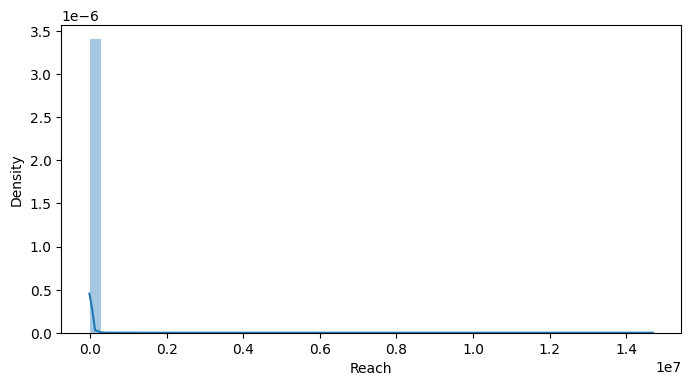

In [ ]:
#Reach Histogram
Reach_Hist = sns.distplot(stats.Reach)

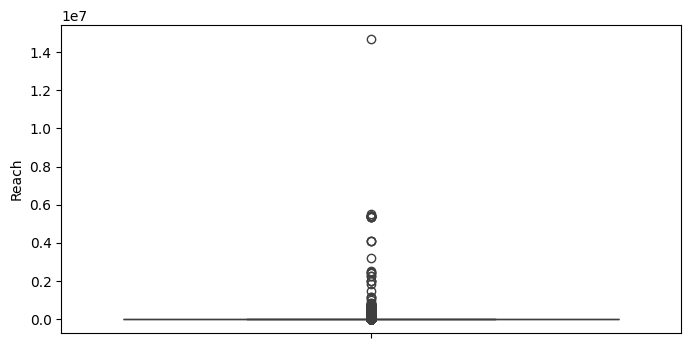

In [ ]:
#Reach Boxplot
Reach_Boxplot = sns.boxplot(stats.Reach)

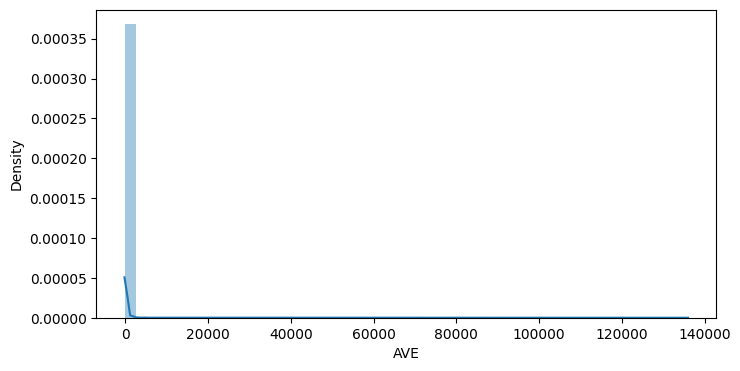

In [ ]:
#AVE Histogram
AVE_Hist = sns.distplot(stats.AVE)

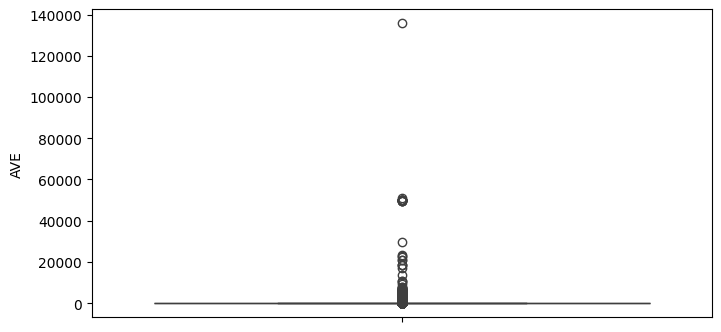

In [ ]:
#AVE Boxplot
AVE_Boxplot = sns.boxplot(stats.AVE)

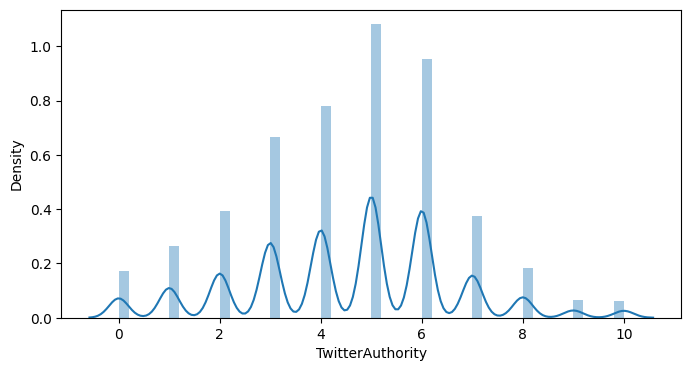

In [ ]:
#TwitterAuthority Histogram
TwitterAuthority_Hist = sns.distplot(stats.TwitterAuthority)

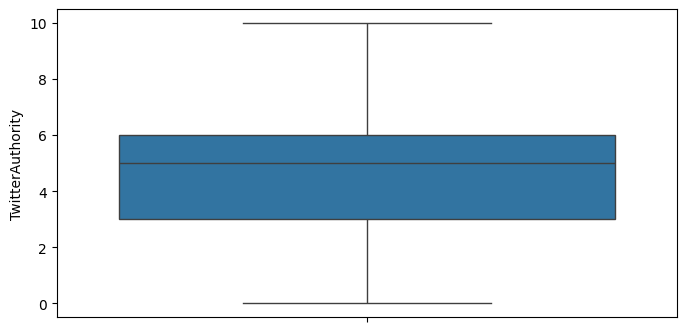

In [ ]:
#TwitterAuthority Boxplot
TwitterAuthority_Boxplot = sns.boxplot(stats.TwitterAuthority)

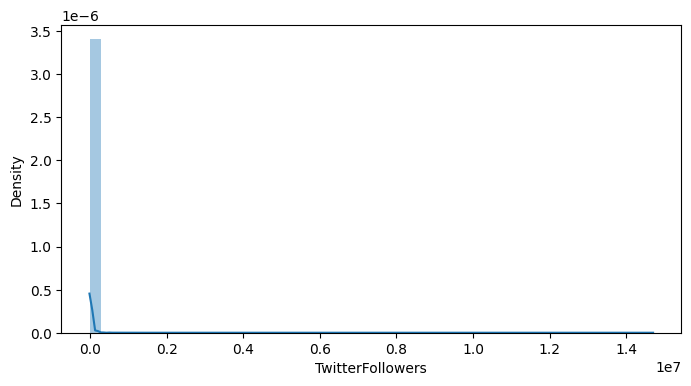

In [ ]:
#TwitterFollowers Histogram
TwitterFollowers_Hist = sns.distplot(stats.TwitterFollowers)

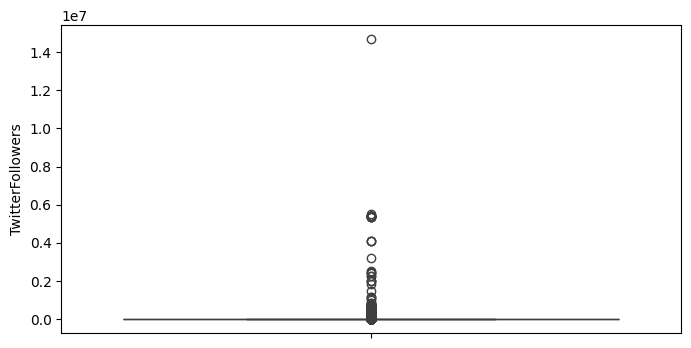

In [ ]:
#TwitterFollowers Boxplot
TwitterFollowers_Boxplot = sns.boxplot(stats.TwitterFollowers)

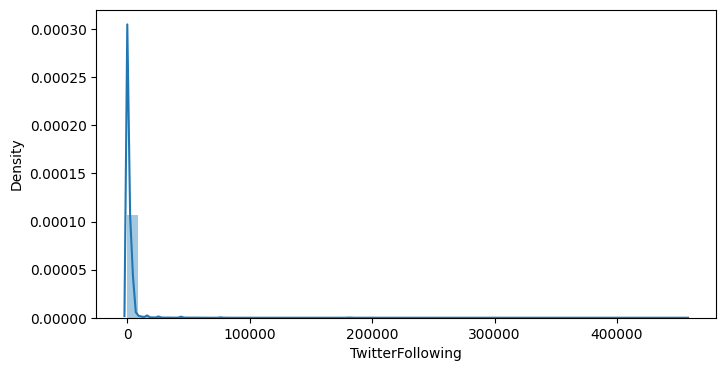

In [ ]:
#TwitterFollowing Histogram
TwitterFollowing_Hist = sns.distplot(stats.TwitterFollowing)

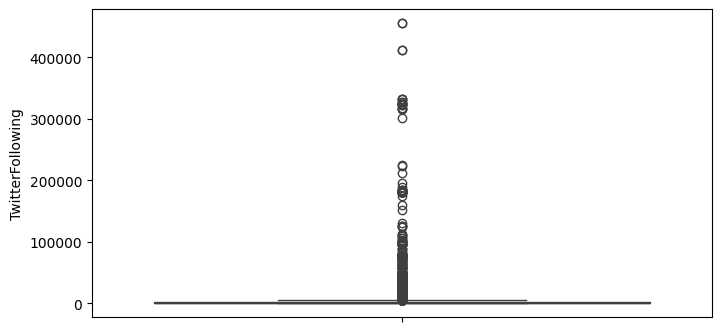

In [ ]:
#TwitterFollowing Boxplot
TwitterFollowing_Boxplot = sns.boxplot(stats.TwitterFollowing)

In [ ]:
#Views Histogram
#Views_Hist = sns.distplot(stats.Views)

In [ ]:
#Views Boxplot
#Views_Boxplot = sns.boxplot(stats.Views)

In [ ]:
#Engagement Boxplot
#Engagement_Boxplot = sns.boxplot(stats.Engagement)

In [ ]:
#Engagement Histogram
#Engagement_Hist = sns.distplot(stats.Engagement)

In [ ]:
#Likes Histogram
#Likes_Hist = sns.distplot(stats.Likes)

In [ ]:
#Likes Boxplot
#Likes_Boxplot = sns.boxplot(stats.Likes)

In [ ]:
#Replies Histogram
#Replies_Hist = sns.distplot(stats.Replies)

In [ ]:
#Replies Boxplot
#Replies_Boxplot = sns.boxplot(stats.Replies)

In [ ]:
#Retweets Histogram
#Retweets_Hist = sns.distplot(stats.Retweets)

In [ ]:
#Retweets Boxplot
#Retweets_Boxplot = sns.boxplot(stats.Retweets)

In [ ]:
#Shares Histogram
#Shares_Hist = sns.distplot(stats.Shares)

In [ ]:
#Shares Boxplot
#Shares_Boxplot = sns.boxplot(stats.Shares)

In [ ]:
#Reactions Histogram
#Reactions_Hist = sns.distplot(stats.Reactions)

In [ ]:
#Reactions Boxplot
#Reactions_Boxplot = sns.boxplot(stats.Reactions)

In [ ]:
#Threads Histogram
#Threads_Hist = sns.distplot(stats.Threads)

In [ ]:
#Threads Boxplot
#Threads_Boxplot = sns.boxplot(stats.Threads)

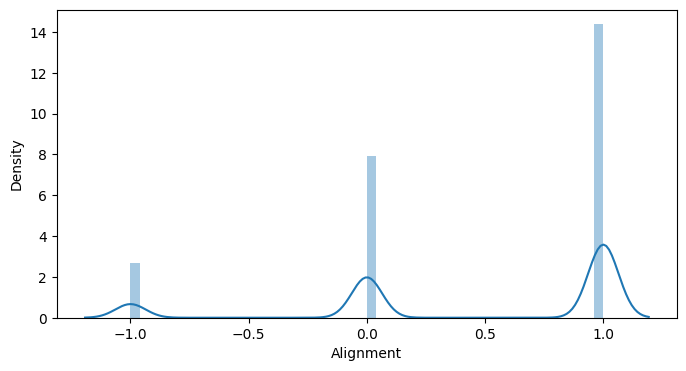

In [ ]:
#Alignment Histogram
Alignment_Hist = sns.distplot(stats.Alignment)

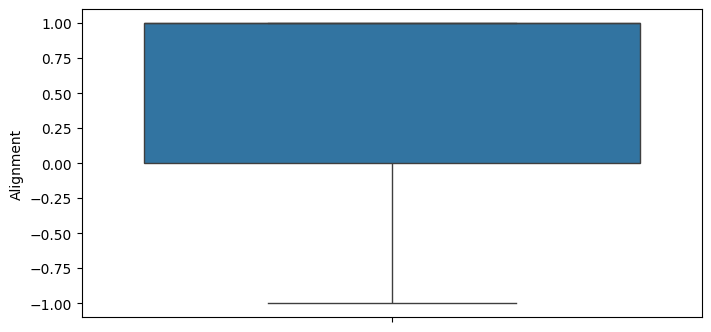

In [ ]:
#Alignment Boxplot
Alignment_Boxplot = sns.boxplot(stats.Alignment)

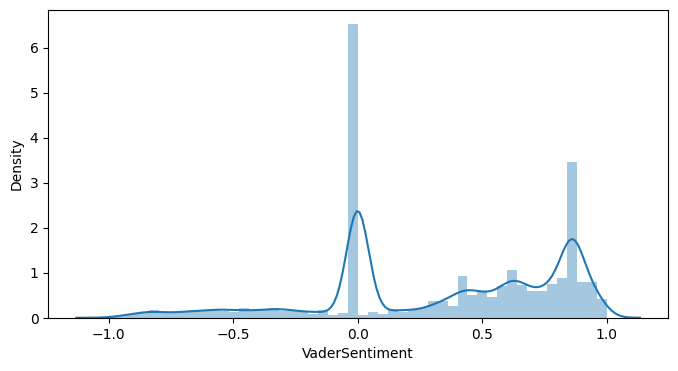

In [ ]:
#VaderSentiment Histogram
VaderSentiment_Hist = sns.distplot(stats.VaderSentiment)
#idetify if there are clear paths so we can do bins, justified by the visualization
#support bin strategy in findings section of dissertation
#Kmeans could be an additional step to categorize this.
#Look into 7 level Vader sentiment
#Pay attention to the large group close to zero

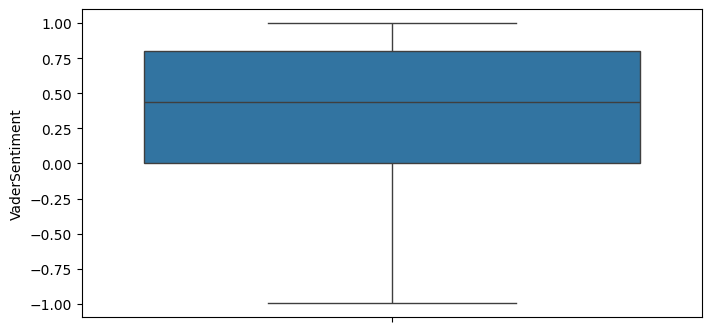

In [ ]:
#VaderSentiment Boxplot
VaderSentiment_Boxplot = sns.boxplot(stats.VaderSentiment)

**Dataset 2 (Stock Price): Data Understanding**

Key Variable Summary Statistics


In [ ]:
stock.describe()

,Date,Open,High,Low,Close,Volume
count,491,491.000000,491.000000,491.000000,491.000000,4.910000e+02
mean,2023-06-27 09:23:05.743380992,97.890204,98.956864,96.828513,97.916273,1.259908e+07
min,2022-07-07 00:00:00,79.100000,79.790000,78.730000,79.320000,5.426053e+06
25%,2022-12-29 12:00:00,90.115000,91.030000,89.400000,90.340000,8.622921e+06
50%,2023-06-28 00:00:00,96.520000,97.780000,95.430000,96.640000,1.091533e+07
75%,2023-12-20 12:00:00,104.995000,106.350000,103.870000,105.370000,1.378024e+07
max,2024-06-20 00:00:00,124.730000,126.480000,123.450000,124.960000,7.027352e+07
std,NaN,10.328561,10.496465,10.196025,10.368918,7.646377e+06


Key Variable Visualizations

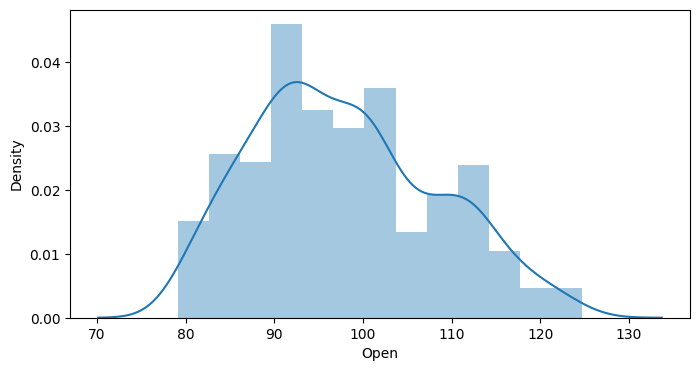

In [ ]:
#Biggest effect of media/news will likely be on the opening price
Open_Hist = sns.distplot(stock.Open)


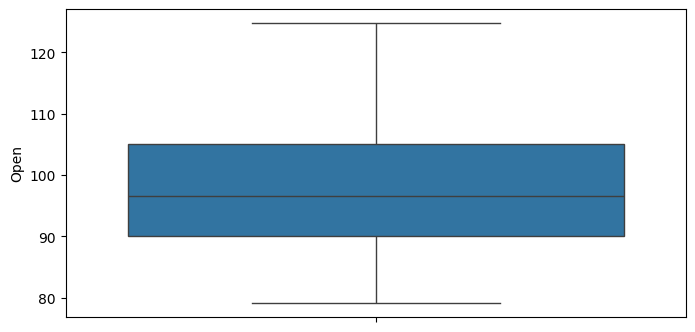

In [ ]:
Open_Box = sns.boxplot(stock.Open)

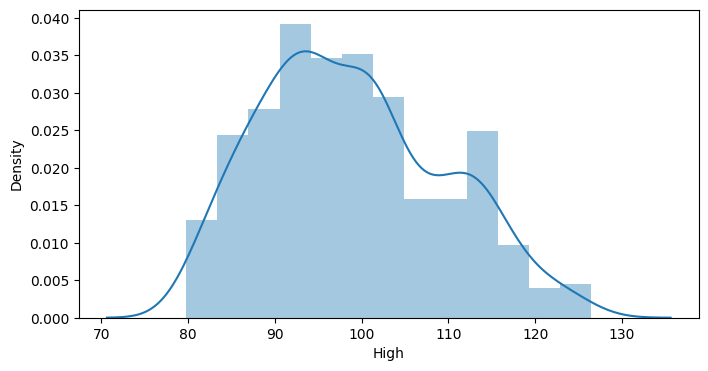

In [ ]:
High_Dist = sns.distplot(stock.High)

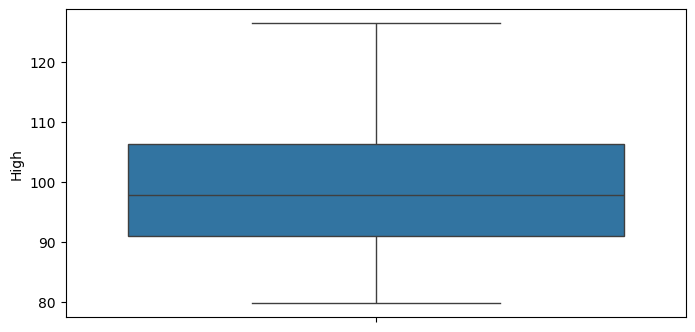

In [ ]:
High_Box = sns.boxplot(stock.High)

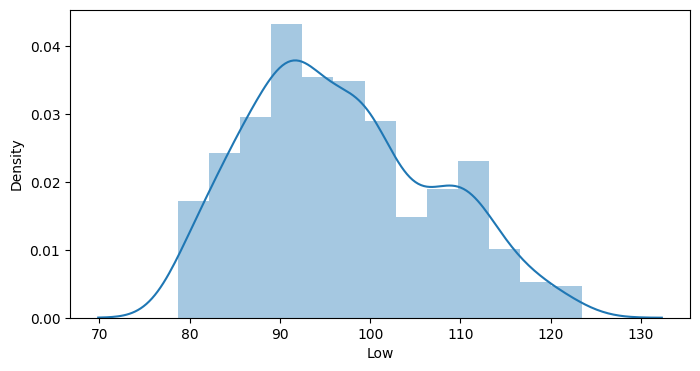

In [ ]:
Low_Dist = sns.distplot(stock.Low)

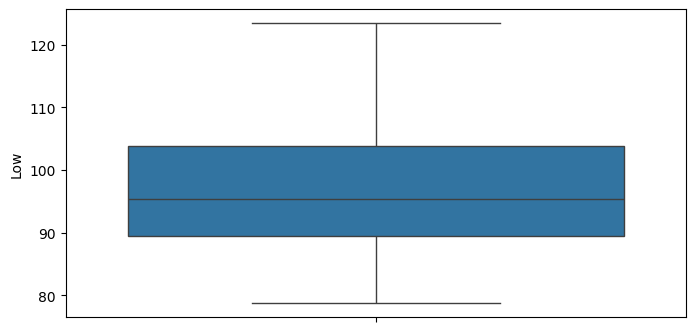

In [ ]:
Low_Box = sns.boxplot(stock.Low)

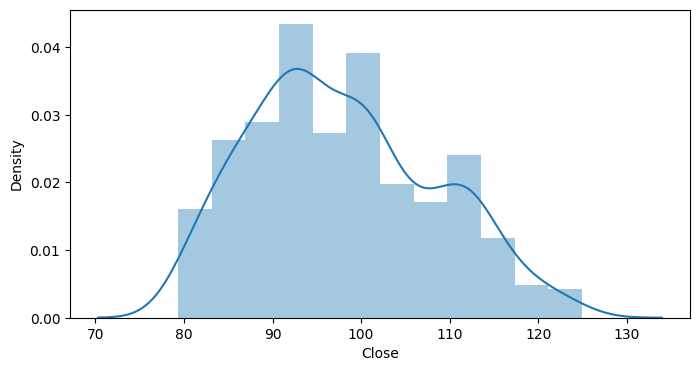

In [ ]:
Close_Dist = sns.distplot(stock.Close)

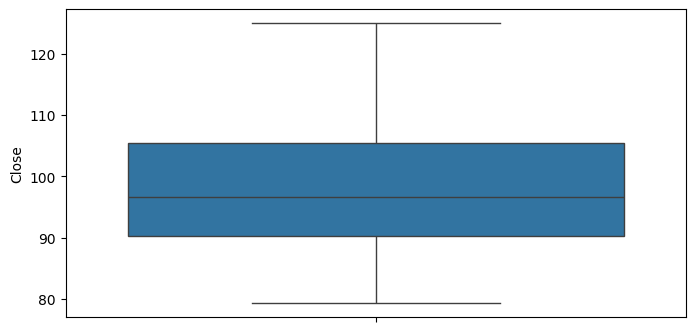

In [ ]:
Close_Box = sns.boxplot(stock.Close)

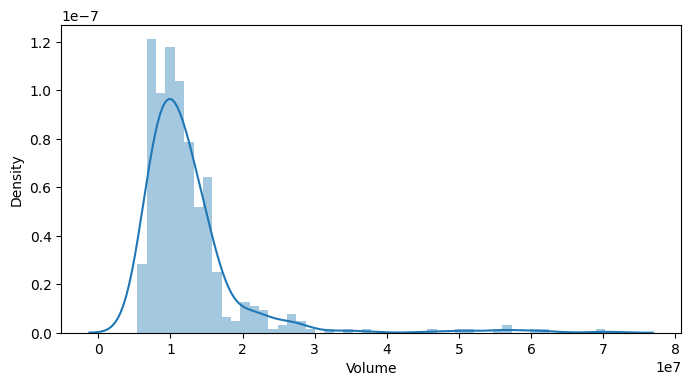

In [ ]:
#Very important
Volume_Dist = sns.distplot(stock.Volume)

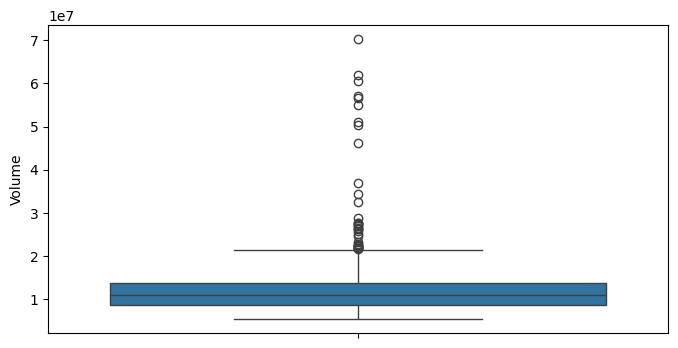

In [ ]:
Volume_Box = sns.boxplot(stock.Volume)

## **Preliminary EDA**

**Dataset 1 (Meltwater)**

Detect and Address Outliers

In [ ]:
#Outier detector function (counts outliers)
def outlier_detector(column):
  outliers = 0
  Q1 = np.percentile(column, 25)
  Q3 = np.percentile(column, 75)
  IQR = Q3-Q1
  Outlier_Min = Q3 + 1.5*IQR
  max = np.max(column)
  for i in range(len(column)):
    if column[i] >= Q3 + 1.5*IQR:
      outliers += 1
  print("Q1 is " + str(Q1))
  print("Q3 is " + str(Q3))
  print("Outliers range from " + str(Outlier_Min) + " to " + str(max))
  print("number of outliers is " + str(outliers))

In [ ]:
#MUST RUN THIS (or data will disappear)
stats = stats.dropna()
stats = stats.reset_index(drop=True)

In [ ]:
outlier_detector(stats.TwitterFollowing)

Q1 is 143.0
Q3 is 1938.0
Outliers range from 4630.5 to 455728.0
number of outliers is 13267


In [ ]:
#Outlier remover (FUNCTION NEEDS TWEAKING)
#def outlier_remover(data, column):
  #Q1 = np.percentile(column, 25)
  #Q3 = np.percentile(column, 75)
  #IQR = Q3-Q1
  #print(IQR)
  #data = data[column < (Q3 + 1.5*IQR)]
  #data = data.reset_index(drop=True)
  #data = pd.DataFrame(data)
  #print(IQR)



In [ ]:
#Removing outliers from all remaining variables
Q1 = np.percentile(stats.Reach, 25)
Q3 = np.percentile(stats.Reach, 75)
IQR = Q3-Q1
print(IQR)
stats = stats[stats['Reach'] < (Q3 + 1.5*IQR)]
stats = stats.reset_index(drop=True)
stats = pd.DataFrame(stats)

Q1 = np.percentile(stats.AVE, 25)
Q3 = np.percentile(stats.AVE, 75)
IQR = Q3-Q1
print(IQR)
stats = stats[stats['AVE'] < (Q3 + 1.5*IQR)]
stats = stats.reset_index(drop=True)
stats = pd.DataFrame(stats)


Q1 = np.percentile(stats.TwitterAuthority, 25)
Q3 = np.percentile(stats.TwitterAuthority, 75)
IQR = Q3-Q1
print(IQR)
stats = stats[stats['TwitterAuthority'] < (Q3 + 1.5*IQR)]
stats = stats.reset_index(drop=True)
stats = pd.DataFrame(stats)

Q1 = np.percentile(stats.TwitterFollowers, 25)
Q3 = np.percentile(stats.TwitterFollowers, 75)
IQR = Q3-Q1
print(IQR)
stats = stats[stats['TwitterFollowers'] < (Q3 + 1.5*IQR)]
stats = stats.reset_index(drop=True)
stats = pd.DataFrame(stats)

Q1 = np.percentile(stats.TwitterFollowing, 25)
Q3 = np.percentile(stats.TwitterFollowing, 75)
IQR = Q3-Q1
print(IQR)
stats = stats[stats['TwitterFollowing'] < (Q3 + 1.5*IQR)]
stats = stats.reset_index(drop=True)
stats = pd.DataFrame(stats)

Q1 = np.percentile(stats.Alignment, 25)
Q3 = np.percentile(stats.Alignment, 75)
IQR = Q3-Q1
print(IQR)
stats = stats[stats['Alignment'] < (Q3 + 1.5*IQR)]
stats = stats.reset_index(drop=True)
stats = pd.DataFrame(stats)

Q1 = np.percentile(stats.VaderSentiment, 25)
Q3 = np.percentile(stats.VaderSentiment, 75)
IQR = Q3-Q1
print(IQR)
stats = stats[stats['VaderSentiment'] < (Q3 + 1.5*IQR)]
stats = stats.reset_index(drop=True)
stats = pd.DataFrame(stats)

1331.0
7.35
2.0
658.0
1052.0
1.0
0.8247249999999999


In [ ]:
def min_max(column):
  min = np.min(column)
  max = np.max(column)
  print("min is " + str(min))
  print("max is " + str(max))


In [ ]:
min_max(stats.TwitterFollowing)

min is 0.0
max is 2724.0


In [ ]:
stats = stats.dropna()
stats = stats.reset_index(drop=True)

In [ ]:
stats.head(5)

,HitSentence,Influencer,Reach,AVE,TwitterAuthority,TwitterFollowers,TwitterFollowing,Date,Alignment,VaderSentiment
0,This Raccoonda needs a mega pint of wine. It w...,@PrincessAzilem,85.0,0.79,3.0,85.0,385.0,2022-07-22,0,0.2023
1,Would you rather spend five days exploring Dis...,@MyRealtorJoshF,0.0,0.00,1.0,0.0,1.0,2022-07-22,0,0.0000
2,Marvel Studios has reportedly trademarked the ...,@justincreates,200.0,1.85,4.0,200.0,890.0,2022-07-22,0,-0.2023
3,So good I had to share! Check out all the item...,@marialugo351,11.0,0.10,2.0,11.0,22.0,2022-07-22,1,0.8620
4,So good I had to share! Check out all the item...,@BriansPosh,429.0,3.97,5.0,429.0,941.0,2022-07-22,1,0.8620


In [ ]:
outlier_detector(stats.AVE)

Q1 is 0.44
Q3 is 5.2
Outliers range from 12.34 to 15.73
number of outliers is 5891


In [ ]:
outlier_detector(stats.Reach)

Q1 is 48.0
Q3 is 562.0
Outliers range from 1333.0 to 1701.0
number of outliers is 5897


In [ ]:
outlier_detector(stats.TwitterAuthority)

Q1 is 3.0
Q3 is 5.0
Outliers range from 8.0 to 6.0
number of outliers is 0


In [ ]:
outlier_detector(stats.TwitterFollowers)

Q1 is 48.0
Q3 is 562.0
Outliers range from 1333.0 to 1701.0
number of outliers is 5897


In [ ]:
outlier_detector(stats.TwitterFollowing)

Q1 is 83.0
Q3 is 855.0
Outliers range from 2013.0 to 2724.0
number of outliers is 6697


**Dataset 2 (Stock Prices)**

Detect and address outliers

In [ ]:
outlier_detector(stock.Open)

Q1 is 90.11500000000001
Q3 is 104.995
Outliers range from 127.315 to 124.73
number of outliers is 0


In [ ]:
outlier_detector(stock.Volume)

Q1 is 8622921.0
Q3 is 13780240.0
Outliers range from 21516218.5 to 70273516
number of outliers is 35


### ***Assembly of Derived Dataset ***

In [ ]:
# Generate sample time series data

#date_rng = pd.date_range(start='2022-07-22', end='2024-04-30', freq='D')--USE FOR OLD DATE RANGE
date_rng = pd.date_range(start='2022-07-22', end='2024-06-21', freq='D')
data = {'date': date_rng}
stats_derived = pd.DataFrame(data)

# Set the 'date' column as the index
stats_derived.set_index('date', inplace=True)



In [ ]:
stats_derived.tail()

""
date
2024-06-17
2024-06-18
2024-06-19
2024-06-20
2024-06-21


**Metrics Consolidated Into Time Series**


Self Congruence derived from ‘VaderSentiment’


In [ ]:
Self_Congruence = stats.groupby(stats["Date"])["VaderSentiment"].mean()
stats_derived['Self_Congruence'] = Self_Congruence
Self_Congruence.head()

,VaderSentiment
Date,
2022-07-22,0.475651
2022-07-23,0.446156
2022-07-24,0.431740
2022-07-25,0.425161
2022-07-26,0.435984


Brand Loyalty Derived from Alignment

> positive_posts_day/posters_day




In [ ]:
stats_alignment = stats["Alignment"]
stats_alignment[stats_alignment<0] = 0
stats_alignment = stats_alignment.to_frame()
stats2 = stats
stats2["Alignment"] = stats_alignment['Alignment']
Number_positive_posts = stats2.groupby(stats2["Date"])["Alignment"].sum()
Number_positive_posts



,Alignment
Date,
2022-07-22,37
2022-07-23,110
2022-07-24,97
2022-07-25,112
2022-07-26,115
...,...
2024-06-17,19
2024-06-18,39
2024-06-19,44


In [ ]:
#number of posters per day
number_poster_per_day = stats2.groupby(stats2["Date"])["Influencer"].unique()
number_poster_per_day

,Influencer
Date,
2022-07-22,"[@PrincessAzilem, @MyRealtorJoshF, @justincrea..."
2022-07-23,"[@Yes_RyanTTV, @cestlavieMSR, @ENOC_21, @espla..."
2022-07-24,"[@MikeH46123995, @AndyJimVlogs, @Umesh_Tharuka..."
2022-07-25,"[@taycholee, @bucknut1978, @CutieJP, @RitaDarl..."
2022-07-26,"[@Guills, @SugarPalace, @spavlenko7, @amydrz, ..."
...,...
2024-06-17,"[@lockwoodco_vfan, @chrisebbert19, @llr_theres..."
2024-06-18,"[@cameronclapp, @lockwoodco_vfan, @davidjhemph..."
2024-06-19,"[@azredscorpion, @disneyfan9523, @fausto316, @..."


In [ ]:
for i in range(len(number_poster_per_day)):
  number_poster_per_day[i] = len(number_poster_per_day[i])


In [ ]:
number_poster_per_day

,Influencer
Date,
2022-07-22,50
2022-07-23,151
2022-07-24,136
2022-07-25,160
2022-07-26,159
...,...
2024-06-17,40
2024-06-18,70
2024-06-19,64


In [ ]:
BrandLoyalty = number_poster_per_day
# Ensure both Series have the same length by dropping the last element of BrandLoyalty
BrandLoyalty = BrandLoyalty.iloc[:-1]
for i in range(len(BrandLoyalty)):
  BrandLoyalty[i] = Number_positive_posts[i]/BrandLoyalty[i]
#print(BrandLoyalty)


In [ ]:
stats_derived['BrandLoyalty'] = BrandLoyalty
stats_derived.shape

(701, 2)

In [ ]:
#NEEDS TO BE REWORKED
#based on the frequency of positive posting on that brand per user

#BrandLoyalty = stats.groupby(stats["Date"])["Alignment"].mean()
#stats_derived['BrandLoyalty'] = BrandLoyalty
#BrandLoyalty.head()

Brand Equity Derived from Sentiment
Average_vader_sentiment/users_per_day


In [ ]:
BrandEquity = [0] * len(Self_Congruence)
for i in range(len(Self_Congruence)):
  BrandEquity[i] = Self_Congruence[i]/(number_poster_per_day[i]+.01)
BrandEquity.append(0)
stats_derived['BrandEquity'] = BrandEquity

In [ ]:
#NEEDS TO BE REWORKED
#calculated using average VADER sentiment score for  brand-focused posts
  #per user per time period (determined by the LSTM timesteps)

#BrandEquity = stats.groupby(stats["Date"])["VaderSentiment"].mean()
#stats_derived['BrandEquity'] = BrandEquity
#BrandEquity.head()



Aggregated (per day) metrics for engagement (post, likes, etc.)


In [ ]:
Reach = stats.groupby(stats["Date"])["Reach"].mean()
stats_derived['Reach'] = Reach
Reach.head()

,Reach
Date,
2022-07-22,343.113208
2022-07-23,365.377907
2022-07-24,329.198718
2022-07-25,348.558659
2022-07-26,336.728814


In [ ]:
AVE = stats.groupby(stats["Date"])["AVE"].mean()
stats_derived['AVE'] = AVE
AVE.head()

,AVE
Date,
2022-07-22,3.173962
2022-07-23,3.380058
2022-07-24,3.044872
2022-07-25,3.224078
2022-07-26,3.114802


In [ ]:
TwitterAuthority = stats.groupby(stats["Date"])["TwitterAuthority"].mean()
stats_derived['TwitterAuthority'] = TwitterAuthority
TwitterAuthority.head()

,TwitterAuthority
Date,
2022-07-22,3.735849
2022-07-23,3.837209
2022-07-24,3.724359
2022-07-25,3.770950
2022-07-26,3.644068


In [ ]:
TwitterFollowers = stats.groupby(stats["Date"])["TwitterFollowers"].mean()
stats_derived['TwitterFollowers'] = TwitterFollowers
TwitterFollowers.head()

,TwitterFollowers
Date,
2022-07-22,343.113208
2022-07-23,365.377907
2022-07-24,329.198718
2022-07-25,348.558659
2022-07-26,336.728814


In [ ]:
TwitterFollowing = stats.groupby(stats["Date"])["TwitterFollowing"].mean()
stats_derived['TwitterFollowing'] = TwitterFollowing
TwitterFollowing.head()

,TwitterFollowing
Date,
2022-07-22,539.490566
2022-07-23,596.186047
2022-07-24,506.788462
2022-07-25,543.910615
2022-07-26,545.960452


In [ ]:
#Engagement = stats.groupby(stats["Date"])["Engagement"].mean()
#stats_derived['Engagement'] = Engagement
#Engagement.head()

In [ ]:
#Views = stats.groupby(stats["Date"])["Views"].mean()
#stats_derived['Views'] = Views
#Views.head()

In [ ]:
#Likes = stats.groupby(stats["Date"])["Likes"].mean()
#stats_derived['Likes'] = Likes
#Likes.head()

In [ ]:
#Replies = stats.groupby(stats["Date"])["Replies"].mean()
#stats_derived['Replies'] = Replies
#Replies.head()

In [ ]:
#Retweets = stats.groupby(stats["Date"])["Retweets"].mean()
#stats_derived['Retweets'] = Retweets
#Retweets.head()

In [ ]:
#Reactions = stats.groupby(stats["Date"])["Reactions"].mean()
#stats_derived['Reactions'] = Reactions
#Reactions.head()

In [ ]:
#Threads = stats.groupby(stats["Date"])["Threads"].mean()
#stats_derived['Threads'] = Threads
#Threads.head()

In [ ]:
stats_derived.tail(5)

,Self_Congruence,BrandLoyalty,BrandEquity,Reach,AVE,TwitterAuthority,TwitterFollowers,TwitterFollowing
date,,,,,,,,
2024-06-17,0.055131,0.475,0.279710,307.020833,2.839583,3.750000,307.020833,513.104167
2024-06-18,0.158635,0.557143,0.234051,382.817204,3.540968,3.870968,382.817204,494.000000
2024-06-19,0.163251,0.6875,0.063748,368.381443,3.408247,4.010309,368.381443,542.587629
2024-06-20,0.033373,0.513514,0.003059,381.482456,3.529386,3.982456,381.482456,415.096491
2024-06-21,0.137691,NaN,0.000000,417.886792,3.865472,4.075472,417.886792,683.547170


Stock Market variable appended to dataset


In [ ]:
stats_derived["Open"] = None

In [ ]:
for i in range(len(stock)):
  for j in range(len(stats_derived)):
    if stock.Date[i] == stats_derived.index[j]:
      stats_derived["Open"][j] = stock.Open[i]


In [ ]:
#Replace the "nones" with the previous price (Friday)
for i in range(len(stats_derived)):
  if stats_derived.Open[i] == None:
    stats_derived.Open[i] = stats_derived.Open[i-1]


In [ ]:

stats_derived.head(5)


,Self_Congruence,BrandLoyalty,BrandEquity,Reach,AVE,TwitterAuthority,TwitterFollowers,TwitterFollowing,Open
date,,,,,,,,,
2022-07-22,0.475651,0.74,0.634201,343.113208,3.173962,3.735849,343.113208,539.490566,103.28
2022-07-23,0.446156,0.728477,0.604157,365.377907,3.380058,3.837209,365.377907,596.186047,103.28
2022-07-24,0.431740,0.713235,0.596956,329.198718,3.044872,3.724359,329.198718,506.788462,103.28
2022-07-25,0.425161,0.7,0.598819,348.558659,3.224078,3.770950,348.558659,543.910615,102.78
2022-07-26,0.435984,0.72327,0.594574,336.728814,3.114802,3.644068,336.728814,545.960452,102.14


In [ ]:
stats_derived.tail()

,Self_Congruence,BrandLoyalty,BrandEquity,Reach,AVE,TwitterAuthority,TwitterFollowers,TwitterFollowing,Open
date,,,,,,,,,
2024-06-17,0.055131,0.475,0.279710,307.020833,2.839583,3.750000,307.020833,513.104167,100.98
2024-06-18,0.158635,0.557143,0.234051,382.817204,3.540968,3.870968,382.817204,494.000000,101.12
2024-06-19,0.163251,0.6875,0.063748,368.381443,3.408247,4.010309,368.381443,542.587629,101.12
2024-06-20,0.033373,0.513514,0.003059,381.482456,3.529386,3.982456,381.482456,415.096491,100.57
2024-06-21,0.137691,NaN,0.000000,417.886792,3.865472,4.075472,417.886792,683.547170,100.57


In [ ]:
len(stats_derived)

701

# **PCA**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
stats_derived = stats_derived.dropna()
stats_derived = stats_derived.reset_index(drop=True)

In [ ]:
dataset = stats_derived
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
#Determine portion of the dataset that is to be the test set
len(stats_derived) - round(len(stats_derived)*.20)



559

In [ ]:
X_train = X[:519]
X_test = X[519:]
y_train = y[:519]
y_test = y[519:]

#X_train = X[:559]
#X_test = X[559:]
#y_train = y[:559]
#y_test = y[559:]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
#pca = PCA(n_components = 5)
  #use the above code with 4 components to create elbow chart
  #with one component confirmed as relevant, re-run with code set to 1 component (below)
pca = PCA(n_components = 3)
#pca = PCA(n_components = 2)
dataset_train = pca.fit_transform(X_train)
dataset_test = pca.transform(X_test)


In [ ]:
pca.explained_variance_ratio_

array([0.59125428, 0.21783272, 0.12696845])

In [ ]:
print(abs( pca.components_ ))

[[0.05487867 0.07000873 0.19363449 0.45148403 0.45147992 0.41456969
  0.45148403 0.41378133]
 [0.71949389 0.55778904 0.38272899 0.08280896 0.08285327 0.04319327
  0.08280896 0.047681  ]
 [0.12387359 0.63094093 0.71535685 0.02435298 0.02437464 0.21798044
  0.02435298 0.15980528]]


In [ ]:
stats_derived.columns

Index(['Self_Congruence', 'BrandLoyalty', 'BrandEquity', 'Reach', 'AVE',
       'TwitterAuthority', 'TwitterFollowers', 'TwitterFollowing', 'Open'],
      dtype='object')

In [ ]:
#To be run with n=5 components in the previous code block
pca_df = pd.DataFrame(data = dataset_train, columns = ['PC 1', 'PC 2', 'PC 3'])
pca_df.head()
print(pca_df)

         PC 1      PC 2      PC 3
0   -1.205423  1.279749  1.237574
1   -0.574856  0.991108  1.190351
2   -1.408968  0.820399  0.953968
3   -1.008501  0.784993  1.073564
4   -1.292576  0.868717  0.923109
..        ...       ...       ...
514 -0.290216 -1.464218 -0.281479
515  0.801954 -1.033556  0.775471
516 -1.148220 -1.097962 -0.537906
517  0.485720 -0.545961  0.641703
518  1.992286 -0.054653  0.969801

[519 rows x 3 columns]


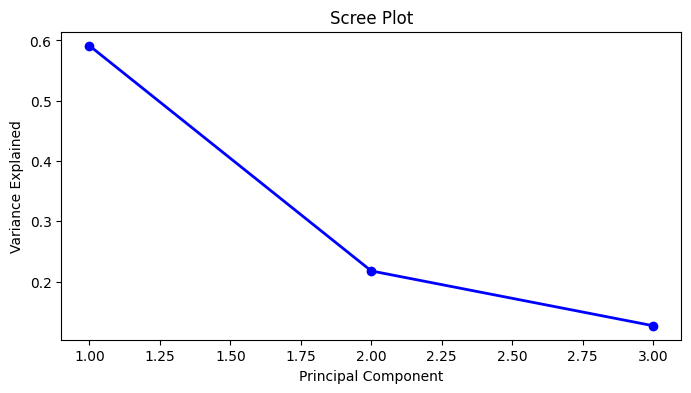

In [ ]:
#Confirming that only one principal component is providing value
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
#Combined x and y pred back into a single dataset with columns
y_train = pd.DataFrame(y_train)
dataset_train = pd.DataFrame(dataset_train)

In [ ]:
y_test = pd.DataFrame(y_test)
dataset_test = pd.DataFrame(dataset_test)

In [ ]:
dataset_train = pd.concat([dataset_train, y_train], axis=1)

In [ ]:
dataset_test = pd.concat([dataset_test, y_test], axis=1)

In [ ]:
dataset_test.head()

,0,1,2,0
0,1.566141,-0.466386,0.869711,91.62
1,-0.030989,-0.581177,-0.623682,91.62
2,0.105665,-0.734599,-0.028874,90.84
3,0.234209,-1.029138,0.209918,90.91
4,-0.641885,-0.220737,0.398944,90.09


# **RNN Modelling**

Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the training set

In [ ]:
#transform into numpy array
#training_set = dataset_train.iloc[:,0:2].values
training_set = dataset_train.iloc[:,0:4].values
training_set

array([[-1.2054229379635377, 1.279749012477103, 1.2375735478277925,
        103.28],
       [-0.5748559461905837, 0.9911083323030108, 1.190350968812689,
        103.28],
       [-1.4089677897190738, 0.8203986665403793, 0.9539680431188636,
        103.28],
       ...,
       [-1.1482200211123752, -1.0979620481096508, -0.5379058659574715,
        91.93],
       [0.48572015835179955, -0.5459614569609678, 0.6417027117807788,
        91.62],
       [1.9922860746767694, -0.054653062293298735, 0.9698012875136459,
        91.62]], dtype=object)

Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1)) #feature range sets the normalization scale between 0 and 1
training_set = pd.DataFrame(training_set)
training_set.columns = training_set.columns.astype(str)
training_set = training_set.astype(float)
training_set_scaled = sc.fit_transform(training_set)
dataset_test = sc.transform(dataset_test)
  #added this to address problem of scale at the end.


Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = [] #input for the model
y_train = [] #output for the model (the predicted variable/value)
#for i in range(60, len(dataset_train)):
#for i in range(7, len(dataset_train)):
for i in range(30, len(dataset_train)):
    #X_train.append(training_set_scaled[i-7:i, 0:3])
    #X_train.append(training_set_scaled[i-60:i, 0:3])
    X_train.append(training_set_scaled[i-30:i, 0:3])
    y_train.append(training_set_scaled[i, -1])
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping

In [ ]:

#This code creates a 3 dimensional shape that could allow for additional variables to be included in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 3))

  #X_train.shape[0]--this gives us the number of rows/lines
  #X_train.shape[1]--this gives us the number of columns
  #The '1' at the end of the code is the number of predictors

Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf

In [ ]:
#from numpy.random import seed
#seed(42)

Initialising the RNN

In [ ]:
regressor = Sequential()
#We are using regression to predict a continuous value

Adding the first LSTM layer and some Dropout regularisation

In [ ]:
#regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 3)))
regressor.add(LSTM(units = 58, return_sequences = True, input_shape = (X_train.shape[1], 3)))
  #input 3 arguments into LSTM():
    # number of units is number of LSTM cells, or memory units or neurons
      #A large number of neurons increases the dimensionality
    # Return sequence indicates that there will be an LSTM layer added after this
    #input shape is the shape of the 3 dimensional array that was created in the "Reshaping" step
regressor.add(Dropout(0.1774505073513715))
  # This "Dropout regularization" is to prevent overfitting
  #This signifies that 20 percent of the neurons (in this case 10) will be dropped out of each iteration...
    #... of the training

Adding a second LSTM layer and some Dropout regularization

In [ ]:
#regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(LSTM(units = 58, return_sequences = True))
  #Note: We do not have to add the input shape argument
regressor.add(Dropout(0.1774505073513715))

Adding a third LSTM layer and some Dropout regularisation

In [ ]:
#regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(LSTM(units = 58, return_sequences = True))
regressor.add(Dropout(0.1774505073513715))

Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
#regressor.add(LSTM(units = 50))
regressor.add(LSTM(units = 58))
  #Note that we don't need the 'return_sequences' argument because this is the last layer before...
    #...the output layer
regressor.add(Dropout(0.1774505073513715))

Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))
  #the units=1 indicates that there is only one dimension to the output layer

Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
#regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')
  #setting the model's optimizer and loss function...
    #...This adjusts the weights of the model
      #the "Adam optimizer" is short for "Adaptive Moment Estimation" and mimimizes the loss function
  #mean squared error is the loss funciton since we're doing a regression

In [ ]:
#LOOK FOR: optuna: looks at all optimizers and chooses the best
  #https://towardsdatascience.com/state-of-the-art-machine-learning-hyperparameter-optimization-with-optuna-a315d8564de1

#The loss was reporting as loss:nan, possibly due to exploding gradients. Gradient clipping may be applied:
#from keras import optimizers

#optimizer = optimizers.Adam(clipvalue=0.5)
#regressor.compile(optimizer=optimizer, loss='mean_squared_error')

In [ ]:
y_train = np.array(y_train, dtype=np.float32)
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)

In [ ]:
#Hyperparameter tuning
#https://docs.google.com/spreadsheets/d/1U_IKsR19jffpC8lj5JdokXuYtt7xFSkTSZ9KBhARnyg/edit?gid=0#gid=0

Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 196, batch_size = 6)#baseline parameters: epoch = 100, batch_size = 32
  #first two arguments signify the model's inputs
  #epochs signifies number of iterations in the training
  #batches indicates that the prediction is made every 32 stock prices

Epoch 1/196
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0463
Epoch 2/196
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0311
Epoch 3/196
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0244
Epoch 4/196
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0212
Epoch 5/196
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0227
Epoch 6/196
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0220
Epoch 7/196
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0226
Epoch 8/196
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0189
Epoch 9/196
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0223
Epoch 10/196
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0230
Epoch 11/196
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0249
Epoch 12/196
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0204
Epoch 13/196
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0205
Epoch 14/196
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0198
Epoch 15/196
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - lo

RUNNING a SAVED MODEL

In [ ]:
#save the model
#import pickle
#pickle.dump(regressor, open('regressor.pkl', 'wb'))
#from google.colab import files
#files.download('regressor.pkl')

In [ ]:
#loading the previous trained model
#regressor_optimal = pickle.load(open('regressor.pkl', 'rb'))
#regressor_optimal

Making the predictions and visualising the results

Getting the real stock price

In [ ]:
  #USE IF RUNNING NEW MODEL
real_stock_price = dataset_test[:, -1]
  #USE IF RUNNING THE SAVED OPTIMAL MODEL
#real_stock_price = dataset_test.iloc[:, -1]

In [ ]:
real_stock_price

array([0.27438089, 0.27438089, 0.25728687, 0.25882095, 0.24085032,
       0.24150778, 0.24150778, 0.24150778, 0.24150778, 0.24106947,
       0.24391847, 0.28139382, 0.24786325, 0.24786325, 0.24786325,
       0.27284681, 0.26188911, 0.23493316, 0.22550953, 0.23120754,
       0.23120754, 0.23120754, 0.23120754, 0.2452334 , 0.29541968,
       0.2533421 , 0.28972167, 0.28972167, 0.28972167, 0.30177515,
       0.35787859, 0.33574403, 0.32478632, 0.34845496, 0.34845496,
       0.34845496, 0.35765943, 0.38176638, 0.37957484, 0.37847907,
       0.37650668, 0.37650668, 0.37650668, 0.38571115, 0.39053254,
       0.40083279, 0.61319307, 0.6684199 , 0.6684199 , 0.6684199 ,
       0.6307254 , 0.63949156, 0.689897  , 0.7008547 , 0.72145518,
       0.72145518, 0.72145518, 0.72145518, 0.69581416, 0.64387464,
       0.63313609, 0.62393162, 0.62393162, 0.62393162, 0.62283585,
       0.62853386, 0.65044927, 0.70216963, 0.70874425, 0.70874425,
       0.70874425, 0.7357002 , 0.75630068, 0.74468551, 0.69252

In [ ]:
dataset_train = dataset_train.reset_index(drop=True)
dataset_test = pd.DataFrame(dataset_test)
dataset_test = dataset_test.reset_index(drop=True)
dataset_test.columns = ["Predictor1", "Predictor2", "Predictor3", "Open"]
dataset_train.columns = ["Predictor1", "Predictor2", "Predictor3", "Open"]
dataset_train.head()

,Predictor1,Predictor2,Predictor3,Open
0,-1.205423,1.279749,1.237574,103.28
1,-0.574856,0.991108,1.190351,103.28
2,-1.408968,0.820399,0.953968,103.28
3,-1.008501,0.784993,1.073564,102.78
4,-1.292576,0.868717,0.923109,102.14


In [ ]:
dataset_test.head()

,Predictor1,Predictor2,Predictor3,Open
0,0.464667,0.429972,0.955295,0.274381
1,0.398981,0.418888,0.823960,0.274381
2,0.404601,0.404073,0.876270,0.257287
3,0.409888,0.375632,0.897270,0.258821
4,0.373856,0.453692,0.913894,0.240850


In [ ]:
# Reset the indices of dataset_train and dataset_test
dataset_train = dataset_train.reset_index(drop=True)
dataset_test = dataset_test.reset_index(drop=True)

# Concatenate the DataFrames

dataset_total = pd.concat((dataset_train[['Predictor1', 'Predictor2', 'Predictor3']], dataset_test[['Predictor1', 'Predictor2', 'Predictor3']]), axis=0)


inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
#inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
#inputs = dataset_total[len(dataset_total) - len(dataset_test) - 7:].values

inputs = inputs.reshape(-1, 3)


print(inputs.shape)

(210, 3)


In [ ]:
from tensorflow.keras.utils import timeseries_dataset_from_array


Getting the predicted stock price

In [ ]:
sc = StandardScaler(with_mean=False, with_std=False)
sc.fit(inputs)
inputs = sc.transform(inputs)
  #Scaling the inputs
X_test = []
#for i in range(7, len(inputs)):
for i in range(30, len(inputs)):
#for i in range(60, len(inputs)):
    #X_test.append(inputs[i-60:i, 0:3])
    X_test.append(inputs[i-30:i, 0:3])
    #X_test.append(inputs[i-7:i, 0:3])
X_test = np.array(X_test)
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test = tf.keras.utils.timeseries_dataset_from_array(
    data=inputs,
    targets=None,
    #sequence_length=60,  #Adjust if timesteps are adjusted
    sequence_length=30,
    #sequence_length=7,
    sampling_rate=1,
    batch_size=6,
    #batch_size=32,
)
  #To RUN A NEW MODEL
predicted_stock_price = regressor.predict(X_test)

  #TO RUN THE PREVIOUSLY SAVED OPTIMAL MODEL:
#predicted_stock_price = regressor_optimal.predict(X_test)

predicted_stock_price = predicted_stock_price.reshape(-1, 1)
  #reshape array with 1 column and as many rows as necessary to accommodate the data

#predicted_stock_price = sc.inverse_transform(inputs)[:,1]
#predicted_stock_price = sc.inverse_transform(predicted_stock_price)[:,0]


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [ ]:
temp=[[predicted_stock_price], [real_stock_price]]
temp


[[array([[0.030056  ],
         [0.03186589],
         [0.0268206 ],
         [0.0198032 ],
         [0.01767132],
         [0.014029  ],
         [0.01252428],
         [0.01133725],
         [0.01328322],
         [0.01443097],
         [0.02537662],
         [0.06618685],
         [0.01032317],
         [0.00937992],
         [0.00913343],
         [0.00916892],
         [0.00860074],
         [0.00980574],
         [0.0162378 ],
         [0.02463701],
         [0.04634142],
         [0.05015713],
         [0.07344128],
         [0.08222981],
         [0.07933837],
         [0.0581367 ],
         [0.05786562],
         [0.06079715],
         [0.22406742],
         [0.17675744],
         [0.24285537],
         [0.23103753],
         [0.2106326 ],
         [0.18245381],
         [0.12250373],
         [0.09145479],
         [0.07160372],
         [0.12782393],
         [0.1557914 ],
         [0.22172779],
         [0.2567153 ],
         [0.27161726],
         [0.2760002 ],
         [0

Visualising the results

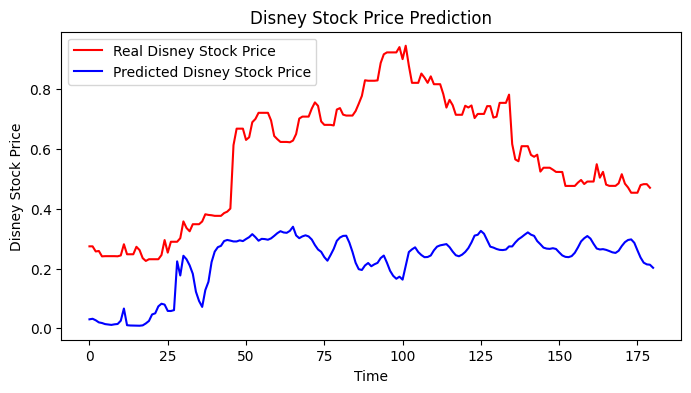

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Disney Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Disney Stock Price')
plt.title('Disney Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Disney Stock Price')
plt.legend()
plt.show()

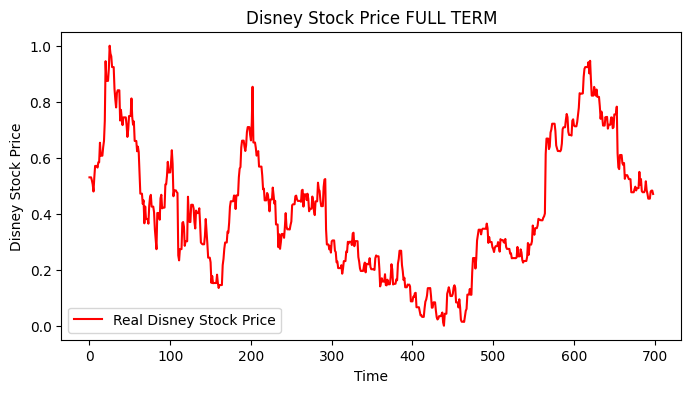

In [ ]:
scale = MinMaxScaler(feature_range = (0, 1))

predicted_stock_price_FULL = stats_derived['Open']
predicted_stock_price_FULL = predicted_stock_price_FULL.to_numpy() # Convert to NumPy array
predicted_stock_price_FULL = predicted_stock_price_FULL.reshape(-1, 1)
predicted_stock_price_FULL = pd.DataFrame(predicted_stock_price_FULL)
predicted_stock_price_FULL = scale.fit_transform(predicted_stock_price_FULL)

plt.plot(predicted_stock_price_FULL, color = 'red', label = 'Real Disney Stock Price')
plt.title('Disney Stock Price FULL TERM')
plt.xlabel('Time')
plt.ylabel('Disney Stock Price')
plt.legend()
plt.show()

Model Evaluation: Using RMSE (Root Mean Squared Error)

In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
if len(real_stock_price) > len(predicted_stock_price):
    real_stock_price = real_stock_price[:len(predicted_stock_price)]
else:
    predicted_stock_price = predicted_stock_price[:len(real_stock_price)]
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
mape = np.mean(np.abs((real_stock_price - predicted_stock_price) / real_stock_price)) * 100


In [ ]:
#Goal: RMSE values between 0.2 and 0.5
print(f"MAE: {mae}, RMSE: {rmse}, MAPE: {mape}%")

MAE: 0.3483637753748789, RMSE: 0.38366493479329006, MAPE: 56.18293917900646%


Cross Correlation

In [ ]:
#https://numpy.org/doc/stable/reference/generated/numpy.correlate.html
predicted_stock_price_corr = np.array(predicted_stock_price).flatten()
real_stock_price_corr = np.array(real_stock_price).flatten()
correlated = np.correlate(predicted_stock_price_corr, real_stock_price_corr, "full") #alternate parameter: "full", "same", "valid"
correlated
#max_index = np.argmax(correlated)
#print(max_index)

array([1.41420626e-02, 2.94980030e-02, 4.25018278e-02, 5.20507673e-02,
       5.97358032e-02, 6.56504162e-02, 7.09640175e-02, 7.64143833e-02,
       8.32522650e-02, 9.16351133e-02, 1.04177479e-01, 1.35479071e-01,
       1.40759304e-01, 1.44975488e-01, 1.48753309e-01, 1.53062282e-01,
       1.58094532e-01, 1.65105799e-01, 1.74134173e-01, 1.86732746e-01,
       2.09717530e-01, 2.31655264e-01, 2.66064063e-01, 3.05153514e-01,
       3.42179206e-01, 3.69854823e-01, 3.98164796e-01, 4.25595047e-01,
       5.34131935e-01, 6.18974439e-01, 7.37208791e-01, 8.50440301e-01,
       9.49006248e-01, 1.03521319e+00, 1.08962956e+00, 1.13315808e+00,
       1.17134192e+00, 1.24370073e+00, 1.32496702e+00, 1.44295257e+00,
       1.57141134e+00, 1.70283947e+00, 1.83281770e+00, 1.97430735e+00,
       2.11517115e+00, 2.27276691e+00, 2.41898640e+00, 2.57249748e+00,
       2.72048264e+00, 2.86251652e+00, 3.01041579e+00, 3.15743605e+00,
       3.31374632e+00, 3.46302435e+00, 3.61551650e+00, 3.77333152e+00,
      

In [ ]:
np.corrcoef( predicted_stock_price_corr, real_stock_price_corr )[0,1]

0.6312940632947214

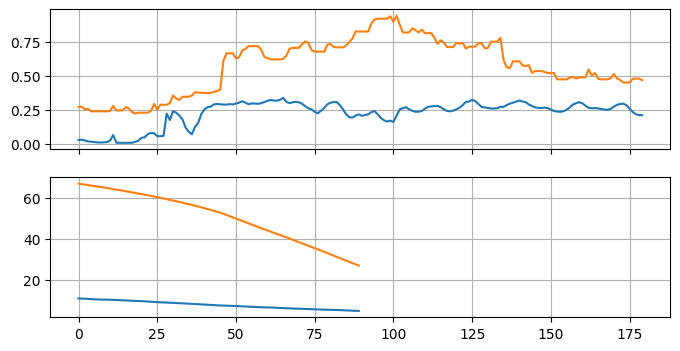

In [ ]:


f, axarr = plt.subplots(2, sharex=True)

axarr[0].plot(predicted_stock_price)
axarr[0].plot(real_stock_price)
axarr[0].grid(True)

autocorrelation1 = np.correlate(predicted_stock_price.flatten(),
                                predicted_stock_price.flatten(),
                                'same')[round(len(predicted_stock_price)/2):]
autocorrelation2 = np.correlate(real_stock_price.flatten(),
                                real_stock_price.flatten(),
                                'same')[round(len(predicted_stock_price)/2):]
axarr[1].plot(autocorrelation1)
axarr[1].plot(autocorrelation2)
axarr[1].grid(True)

plt.show()

TIME SHIFT

In [ ]:
predicted_stock_price_shift = predicted_stock_price[:132]
real_stock_price_shift = real_stock_price[48:]




In [ ]:
len(predicted_stock_price_shift)

132

In [ ]:
predicted_stock_price_shift = predicted_stock_price_shift[:100]
real_stock_price_shift = real_stock_price_shift[:100]

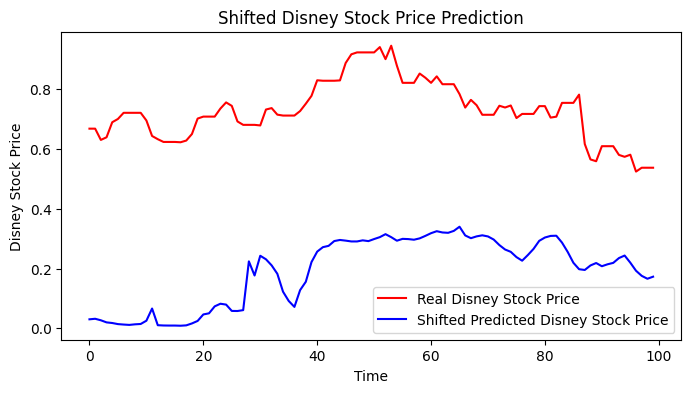

In [ ]:
plt.plot(real_stock_price_shift, color = 'red', label = 'Real Disney Stock Price')
plt.plot(predicted_stock_price_shift, color = 'blue', label = 'Shifted Predicted Disney Stock Price')
plt.title('Shifted Disney Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Disney Stock Price')
plt.legend()
plt.show()

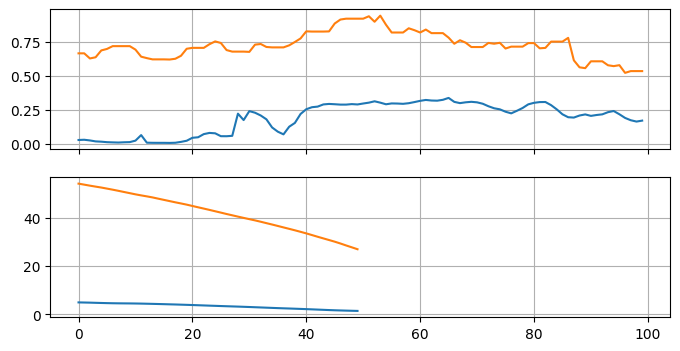

In [ ]:
f, axarr = plt.subplots(2, sharex=True)

axarr[0].plot(predicted_stock_price_shift)
axarr[0].plot(real_stock_price_shift)
axarr[0].grid(True)

autocorrelation1 = np.correlate(predicted_stock_price_shift.flatten(),
                                predicted_stock_price_shift.flatten(),
                                'same')[round(len(predicted_stock_price_shift)/2):]
autocorrelation2 = np.correlate(real_stock_price_shift.flatten(),
                                real_stock_price_shift.flatten(),
                                'same')[round(len(predicted_stock_price_shift)/2):]
axarr[1].plot(autocorrelation1)
axarr[1].plot(autocorrelation2)
axarr[1].grid(True)

plt.show()

In [ ]:
shift_rmse = math.sqrt(mean_squared_error(real_stock_price_shift, predicted_stock_price_shift))
shift_mae = mean_absolute_error(real_stock_price_shift, predicted_stock_price_shift)
shift_mape = np.mean(np.abs((real_stock_price_shift - predicted_stock_price_shift) / real_stock_price_shift)) * 100


In [ ]:
# APE value for each of the records in dataset
APE = []

# Iterate over the list values
for day in range(len(real_stock_price_shift)):

    # Calculate percentage error
    per_err = (real_stock_price_shift[day] - predicted_stock_price_shift[day]) / real_stock_price_shift[day]

    # Take absolute value of
    # the percentage error (APE)
    per_err = abs(per_err)

    # Append it to the APE list
    APE.append(per_err)

# Calculate the MAPE
MAPE = sum(APE)/len(APE)

# Print the MAPE value and percentage
print(MAPE)

[0.74169546]


In [ ]:
print(f"MAE: {mae}, RMSE: {rmse}, MAPE: {mape}%")

MAE: 0.3483637753748789, RMSE: 0.38366493479329006, MAPE: 56.18293917900646%


In [ ]:
print(f"shift_MAE: {shift_mae}, shift_RMSE: {shift_rmse}, shift_MAPE: {shift_mape}%")

shift_MAE: 0.5370758268710634, shift_RMSE: 0.547035414511414, shift_MAPE: 73.13955821774726%


In [ ]:
print(f"MAE: {shift_mae - mae}, RMSE: {shift_rmse - rmse}, MAPE: {shift_mape - mape}%")

MAE: 0.18871205149618447, RMSE: 0.16337047971812396, MAPE: 16.956619038740804%


In [ ]:
#Correlation Coefficient:
predicted_stock_price_corr = np.array(predicted_stock_price_shift).flatten()
real_stock_price_corr = np.array(real_stock_price_shift).flatten()
correlated = np.correlate(predicted_stock_price_corr, real_stock_price_corr, "full")


In [ ]:
np.corrcoef( predicted_stock_price_corr, real_stock_price_corr )[0,1]

0.5240752434686446

Cross Correlation Using scipy

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html#scipy.signal.correlate
from scipy import signal
#import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [ ]:
#LOOK INTO THE SHIFT--is it forward or backwards
corr = signal.correlate(predicted_stock_price_corr, real_stock_price_corr, mode='full')
lags = signal.correlation_lags(len(predicted_stock_price_corr), len(real_stock_price_corr))
corr /= np.max(corr)

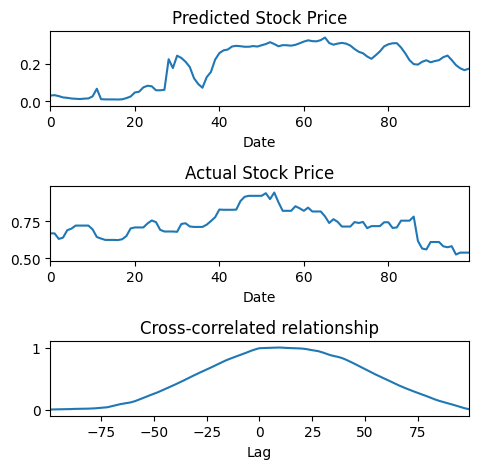

In [ ]:
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(4.8, 4.8))
ax_orig.plot(predicted_stock_price_corr)
ax_orig.set_title('Predicted Stock Price')
ax_orig.set_xlabel('Date')
ax_noise.plot(real_stock_price_corr)
ax_noise.set_title('Actual Stock Price')
ax_noise.set_xlabel('Date')
ax_corr.plot(lags, corr) # Now 'lags' and 'corr' have the same length
ax_corr.set_title('Cross-correlated relationship')
ax_corr.set_xlabel('Lag')
ax_orig.margins(0, 0.1)
ax_noise.margins(0, 0.1)
ax_corr.margins(0, 0.1)
fig.tight_layout()
plt.show()

In [ ]:
corr = signal.correlate(predicted_stock_price_corr, real_stock_price_corr, mode='same')

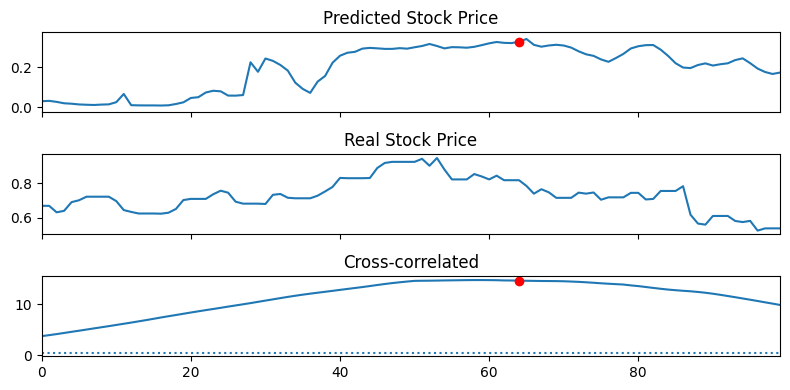

In [ ]:
clock = np.arange(64, len(predicted_stock_price_corr), len(predicted_stock_price_corr))
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(predicted_stock_price_corr)
ax_orig.plot(clock, predicted_stock_price_corr[clock], 'ro')
ax_orig.set_title('Predicted Stock Price')
ax_noise.plot(real_stock_price_corr)
ax_noise.set_title('Real Stock Price')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()